# CA3 Final Project
## EDA and Preprocessing Enhancements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Load dataset
df = pd.read_csv("EU_Data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 310 non-null    object 
 1   City                    310 non-null    object 
 2   Q1_2020                 310 non-null    float64
 3   Q2_2020                 310 non-null    float64
 4   Q3_2020                 310 non-null    float64
 5   Q4_2020                 310 non-null    float64
 6   Q1_2021                 310 non-null    float64
 7   Q2_2021                 310 non-null    float64
 8   Q3_2021                 310 non-null    float64
 9   Q4_2021                 310 non-null    float64
 10  Q1_2022                 310 non-null    float64
 11  Q2_2022                 310 non-null    float64
 12  Q3_2022                 310 non-null    float64
 13  Q4_2022                 310 non-null    float64
 14  Q1_2023                 310 non-null    fl

In [3]:
df.head()

,Country,City,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Q1_2021,Q2_2021,Q3_2021,Q4_2021,...,Q2_2024,Q3_2024,GDP_Growth_Rate,Unemployment_Rate,Population_Growth_Rate,Interest_Rate,Average_Income,Urbanization_Rate,Region,Climate Zone
0,Austria,Zurich,153.52,154.64,157.34,158.39,164.63,167.65,169.43,169.38,...,161.48,161.4,2.17,6.7,1.17,2.73,55000,75.57,Central Europe,Continental
1,Austria,Geneva,153.52,157.41,157.34,156.28,164.63,165.77,169.43,170.97,...,158.90,161.4,2.17,6.7,1.17,2.73,55000,75.57,Central Europe,Continental
2,Austria,Linz,153.52,155.74,157.34,159.36,164.63,170.67,169.43,168.91,...,158.93,161.4,2.17,6.7,1.17,2.73,55000,75.57,Central Europe,Continental
3,Austria,Bern,153.52,157.63,157.34,154.29,164.63,175.04,169.43,166.16,...,163.95,161.4,2.17,6.7,1.17,2.73,55000,75.57,Central Europe,Continental
4,Austria,Vienna,153.52,152.86,157.34,159.97,164.63,176.92,169.43,166.74,...,160.73,161.4,2.17,6.7,1.17,2.73,55000,75.57,Central Europe,Continental


In [4]:
df.describe()

,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Q1_2021,Q2_2021,Q3_2021,Q4_2021,Q1_2022,Q2_2022,...,Q4_2023,Q1_2024,Q2_2024,Q3_2024,GDP_Growth_Rate,Unemployment_Rate,Population_Growth_Rate,Interest_Rate,Average_Income,Urbanization_Rate
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,...,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,149.961161,151.167871,153.603839,151.564935,158.921226,161.957742,163.854484,160.998097,166.231387,165.515323,...,165.633065,167.129032,168.587000,168.992613,2.583194,4.954129,1.165645,3.367935,43775.806452,69.978710
std,23.051329,24.691173,25.841918,24.837270,29.103117,30.798524,31.666653,30.831430,33.077651,32.913135,...,35.777273,36.156430,37.182304,37.592564,0.456766,1.103178,0.205877,0.485533,16846.065730,4.354895
min,103.760000,101.040000,101.080000,100.530000,103.950000,102.410000,101.280000,100.200000,105.660000,104.560000,...,103.140000,102.660000,100.430000,101.270000,1.620000,2.920000,0.720000,1.090000,20000.000000,61.980000
25%,135.170000,134.557500,137.510000,135.677500,139.690000,140.670000,142.860000,140.417500,143.200000,140.770000,...,136.167500,137.880000,140.665000,140.100000,2.320000,3.882500,0.990000,3.230000,30000.000000,67.072500
50%,150.900000,154.295000,155.150000,152.925000,162.015000,163.290000,165.620000,162.720000,166.810000,166.630000,...,168.035000,165.685000,170.320000,168.390000,2.570000,4.820000,1.180000,3.500000,40000.000000,68.530000
75%,165.812500,167.002500,171.790000,167.582500,178.415000,182.282500,187.175000,181.662500,189.602500,186.527500,...,186.630000,189.725000,190.352500,191.400000,2.880000,6.050000,1.340000,3.700000,60000.000000,73.297500
max,213.760000,221.600000,226.340000,219.940000,246.460000,256.120000,258.240000,255.650000,265.780000,269.430000,...,280.960000,273.970000,285.210000,280.530000,3.570000,6.820000,1.550000,3.920000,85500.000000,82.170000


### Feature Engineering

In [5]:
df['GDP_Urban_Interaction'] = df['GDP_Growth_Rate'] * df['Urbanization_Rate']
df['Income_Unemployment_Ratio'] = df['Average_Income'] / (df['Unemployment_Rate'] + 1)


In [6]:
df_encoded = pd.get_dummies(df, columns=['Region', 'Climate Zone'], drop_first=True)


### EDA Visualizations

### Boxplot – Housing Prices by Climate Zone

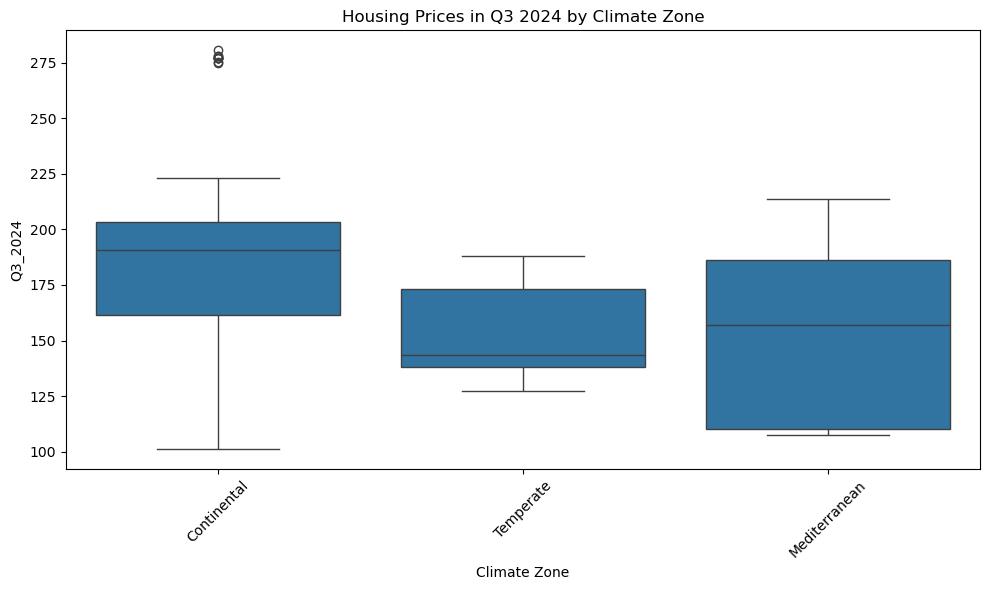

In [7]:
# Boxplot: Housing Prices in Q3 2024 by Climate Zone
plt.figure(figsize=(10, 6))
sns.boxplot(x='Climate Zone', y='Q3_2024', data=df)
plt.title('Housing Prices in Q3 2024 by Climate Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


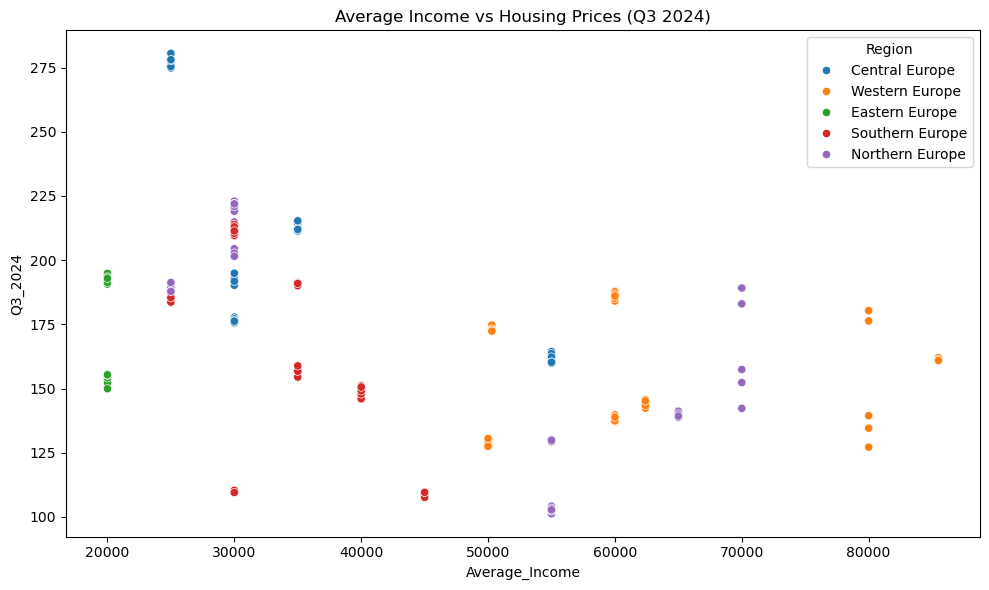

In [8]:
# Scatter plot: Average Income vs Housing Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Income', y='Q3_2024', hue='Region', data=df)
plt.title('Average Income vs Housing Prices (Q3 2024)')
plt.tight_layout()
plt.show()


### Correlation Heatmap – Feature Relationships

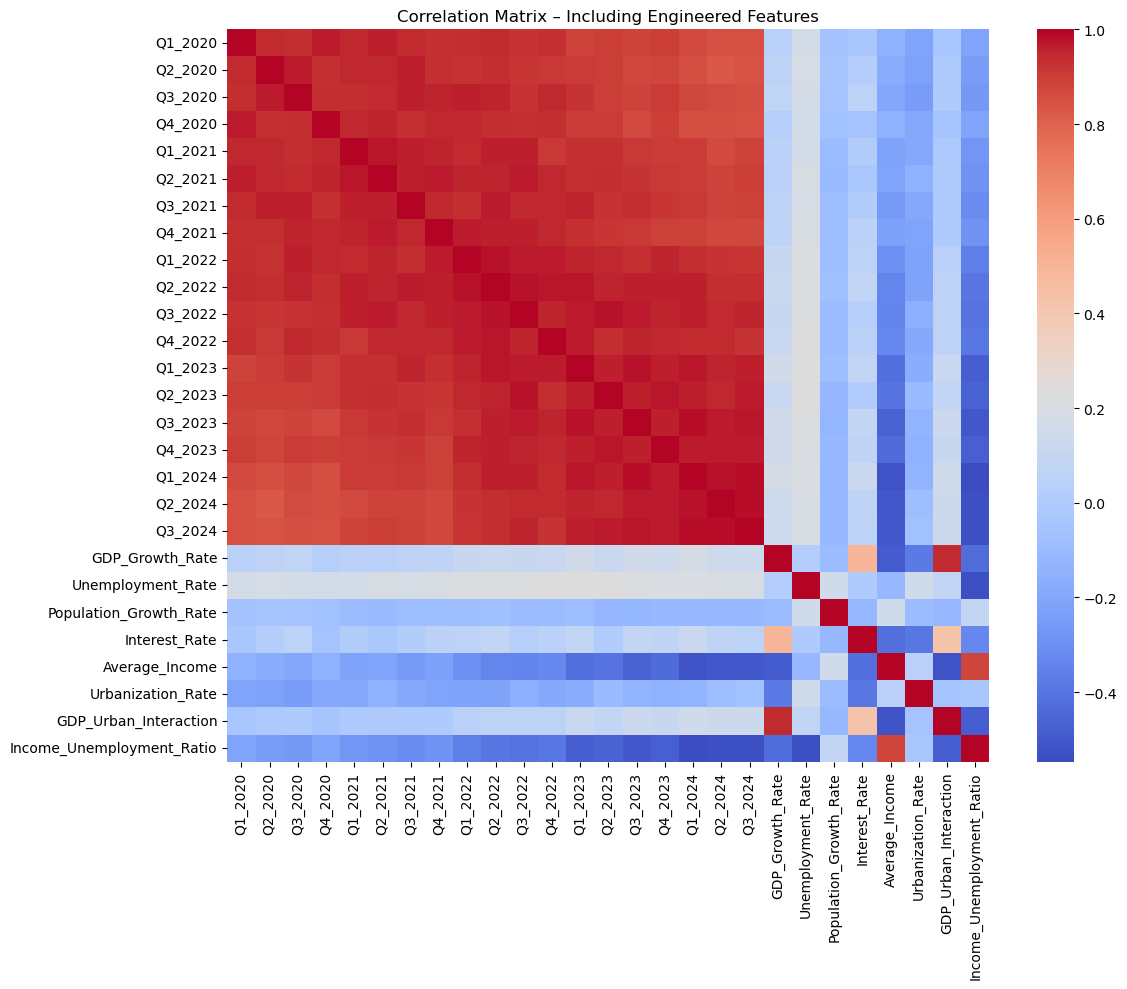

In [9]:
# Correlation heatmap with engineered features
plt.figure(figsize=(12, 10))
corr = df_encoded.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix – Including Engineered Features")
plt.tight_layout()
plt.show()


### Pairplot – Selected Features

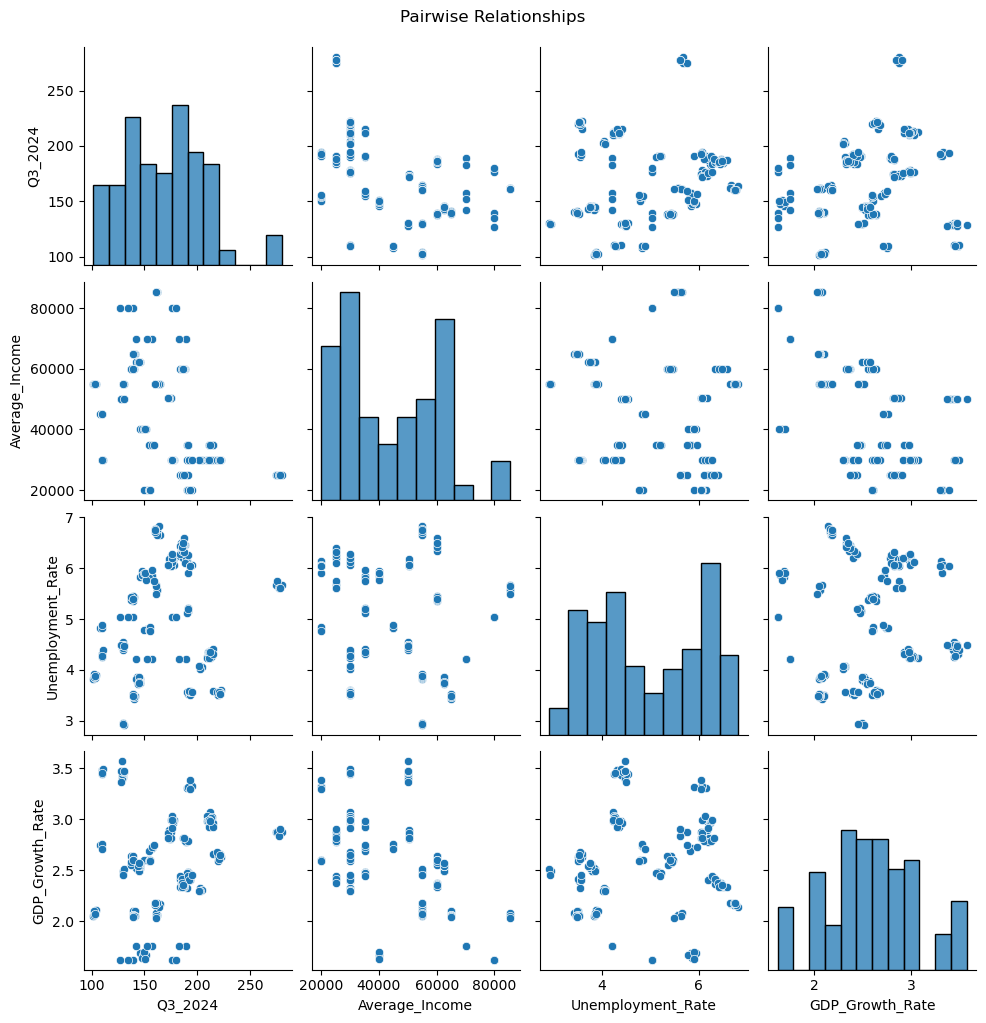

In [10]:
sns.pairplot(df[['Q3_2024', 'Average_Income', 'Unemployment_Rate', 'GDP_Growth_Rate']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


### Data Preprocessing and Train-Test Split

In [11]:
# Drop identifiers
drop_columns = ['Country', 'City']
df_model = df_encoded.drop(columns=drop_columns)

# Define X and y
X = df_model.drop(columns=['Q3_2024'])
y = df_model['Q3_2024']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numeric_cols = ['GDP_Growth_Rate', 'Unemployment_Rate', 'Population_Growth_Rate',
                'Interest_Rate', 'Average_Income', 'Urbanization_Rate',
                'GDP_Urban_Interaction', 'Income_Unemployment_Ratio']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


## ML Model Implementation & Evaluation

In [12]:
# Feature Engineering
df['GDP_Urban_Interaction'] = df['GDP_Growth_Rate'] * df['Urbanization_Rate']
df['Income_Unemployment_Ratio'] = df['Average_Income'] / (df['Unemployment_Rate'] + 1)
df_encoded = pd.get_dummies(df, columns=['Region', 'Climate Zone'], drop_first=True)

# Drop unnecessary columns
drop_columns = ['Country', 'City']
df_model = df_encoded.drop(columns=drop_columns)

X = df_model.drop(columns=['Q3_2024'])
y = df_model['Q3_2024']

In [13]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
numeric_cols = ['GDP_Growth_Rate', 'Unemployment_Rate', 'Population_Growth_Rate',
                'Interest_Rate', 'Average_Income', 'Urbanization_Rate',
                'GDP_Urban_Interaction', 'Income_Unemployment_Ratio']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [14]:
# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }


### Linear Regression

In [15]:
# Linear Regression baseline model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_results = {
    "R2 Score": r2_score(y_test, linreg.predict(X_test)),
    "MAE": mean_absolute_error(y_test, linreg.predict(X_test)),
    "RMSE": np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))
}
linreg_results


{'R2 Score': 0.9550910205223128,
 'MAE': 3.411904733226862,
 'RMSE': np.float64(7.978096481288669)}

### Actual vs Predicted Plot
Visually assess how well the model predicts values. Points should lie near the diagonal line.

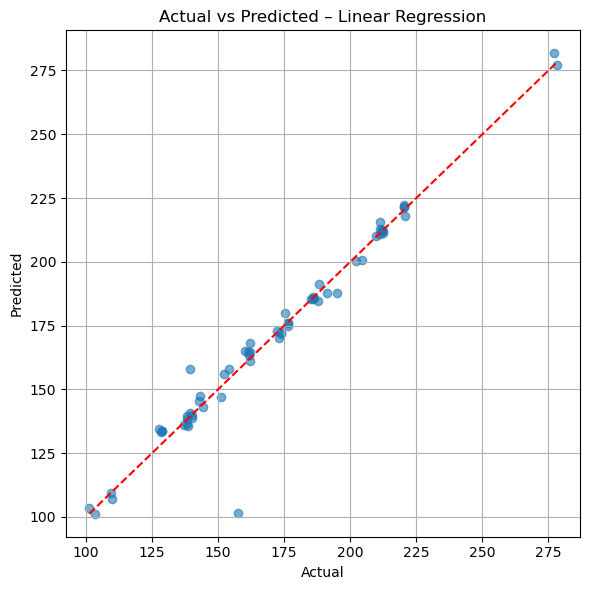

In [16]:
import matplotlib.pyplot as plt

y_pred_linreg = linreg.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_linreg, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted – Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()


### Residual Plot
Show residual errors (Actual - Predicted) to identify non-linearity, outliers, or heteroscedasticity.

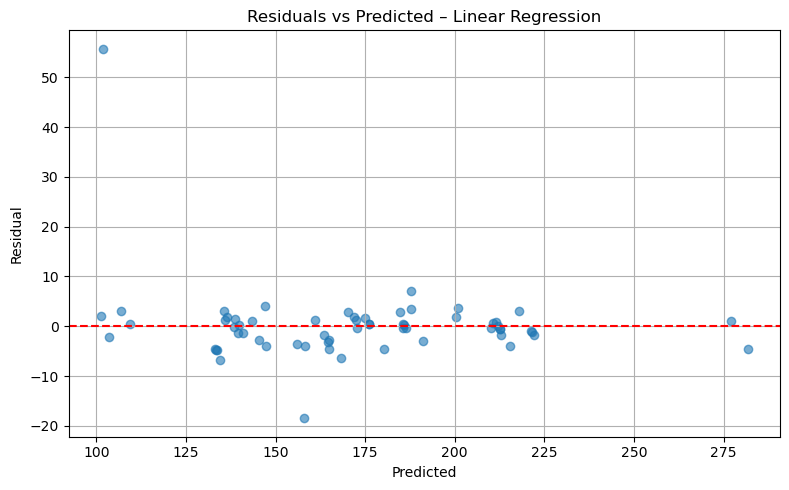

In [17]:
residuals_linreg = y_test - y_pred_linreg

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_linreg, residuals_linreg, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted – Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()


### Random Forest – Hyperparameter Tuning and Evaluation

In [18]:
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid={
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    cv=5,
    scoring='r2',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)
rf_results = evaluate_model(rf_grid.best_estimator_, X_train, y_train, X_test, y_test)
rf_results


{'R2 Score': 0.9880155407738522,
 'MAE': 1.6667274193548247,
 'RMSE': np.float64(4.121372909269196)}

### Actual vs Predicted – Random Forest

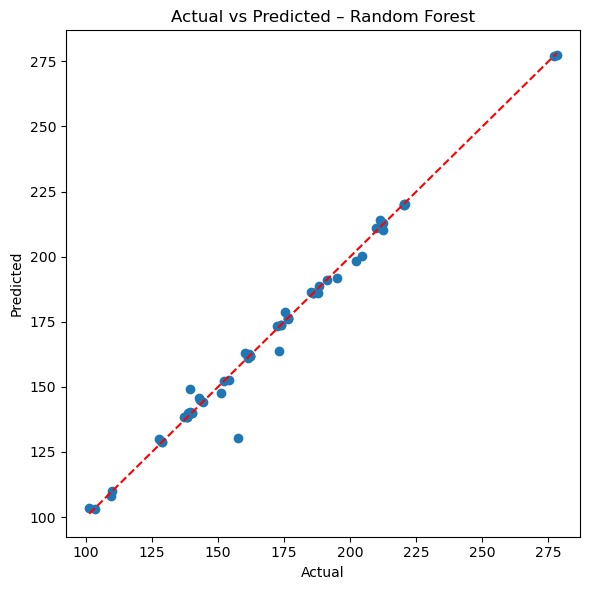

In [19]:
y_pred = rf_grid.best_estimator_.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted – Random Forest")
plt.tight_layout()
plt.show()


### Residual Plot – Random Forest

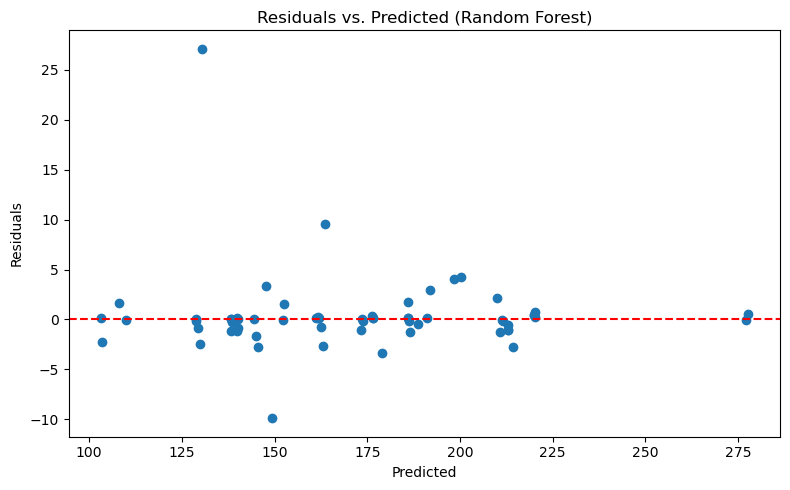

In [20]:
y_pred = rf_grid.best_estimator_.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


### Gradient Boosting – Hyperparameter Tuning and Evaluation

In [21]:
gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid={
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 2]
    },
    cv=5,
    scoring='r2',
    n_jobs=-1
)
gb_grid.fit(X_train, y_train)
gb_results = evaluate_model(gb_grid.best_estimator_, X_train, y_train, X_test, y_test)
gb_results


{'R2 Score': 0.9810585573437431,
 'MAE': 2.3407534061397133,
 'RMSE': np.float64(5.1813057127339155)}

### Actual vs Predicted Plot

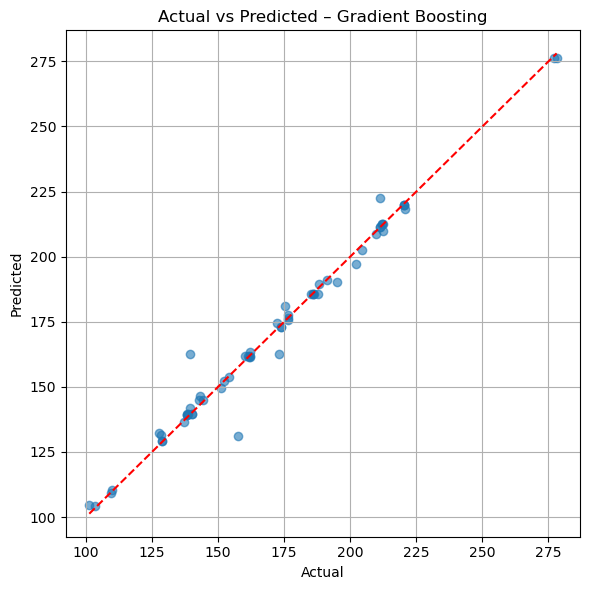

In [22]:
y_pred_gb = gb_grid.best_estimator_.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted – Gradient Boosting")
plt.grid(True)
plt.tight_layout()
plt.show()


### Residual Plot

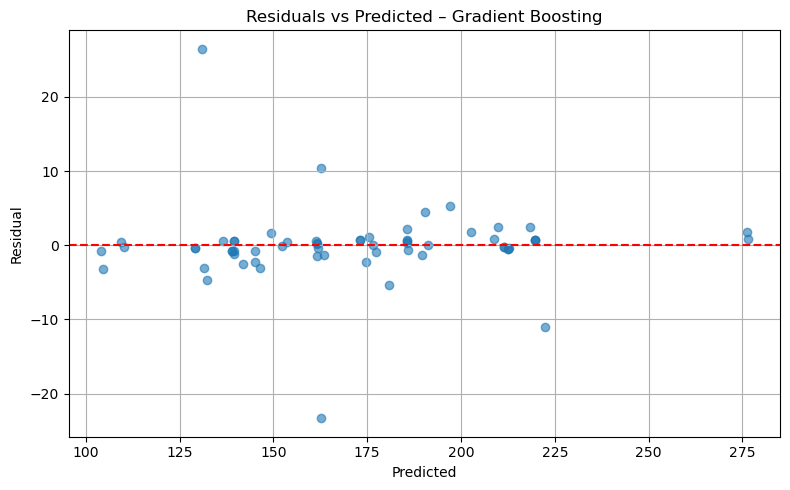

In [23]:
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_gb, residuals_gb, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted – Gradient Boosting")
plt.grid(True)
plt.tight_layout()
plt.show()


### XGBoost Regressor – Tuned Gradient Boosting Alternative

In [24]:
# XGBoost Regressor – Advanced Gradient Boosting Model
from xgboost import XGBRegressor

# Initialize model
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit model
xgb_model.fit(X_train, y_train)

# Evaluate
xgb_results = {
    "R2 Score": r2_score(y_test, xgb_model.predict(X_test)),
    "MAE": mean_absolute_error(y_test, xgb_model.predict(X_test)),
    "RMSE": np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))
}
xgb_results


{'R2 Score': 0.9758722903506284,
 'MAE': 2.3233582773516246,
 'RMSE': np.float64(5.8477761534617265)}

### Actual vs Predicted Plot

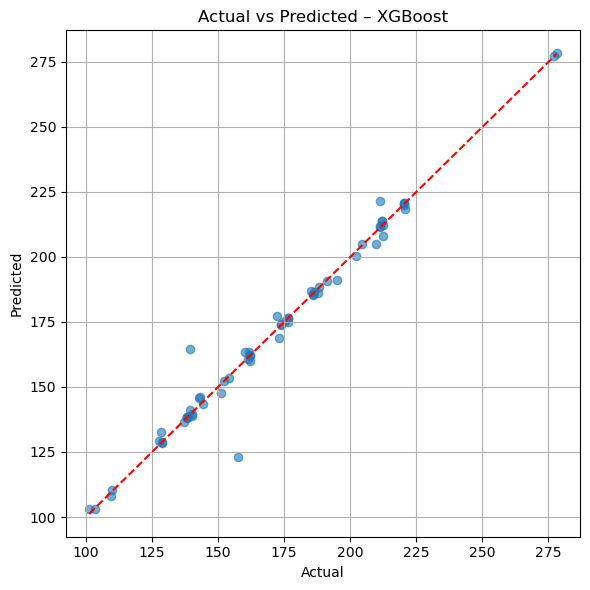

In [25]:
y_pred_xgb = xgb_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted – XGBoost")
plt.grid(True)
plt.tight_layout()
plt.show()


### Residual Plot

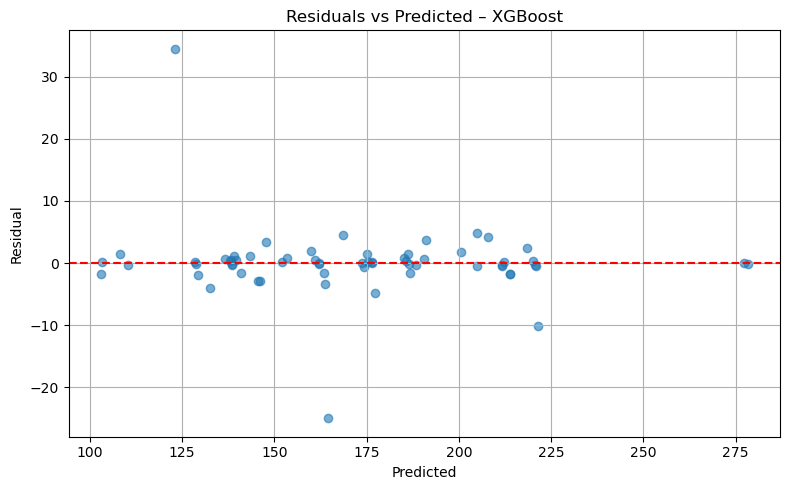

In [26]:
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted – XGBoost")
plt.grid(True)
plt.tight_layout()
plt.show()


### SVR – Support Vector Regression

In [27]:
# Support Vector Regression (SVR)
from sklearn.svm import SVR

# Initialize SVR model with radial basis function (RBF) kernel
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Fit model
svr_model.fit(X_train, y_train)

# Evaluate
svr_results = {
    "R2 Score": r2_score(y_test, svr_model.predict(X_test)),
    "MAE": mean_absolute_error(y_test, svr_model.predict(X_test)),
    "RMSE": np.sqrt(mean_squared_error(y_test, svr_model.predict(X_test)))
}
svr_results


{'R2 Score': 0.9931581049442433,
 'MAE': 2.3607928623230436,
 'RMSE': np.float64(3.1140163982257394)}

### Actual vs Predicted Plot

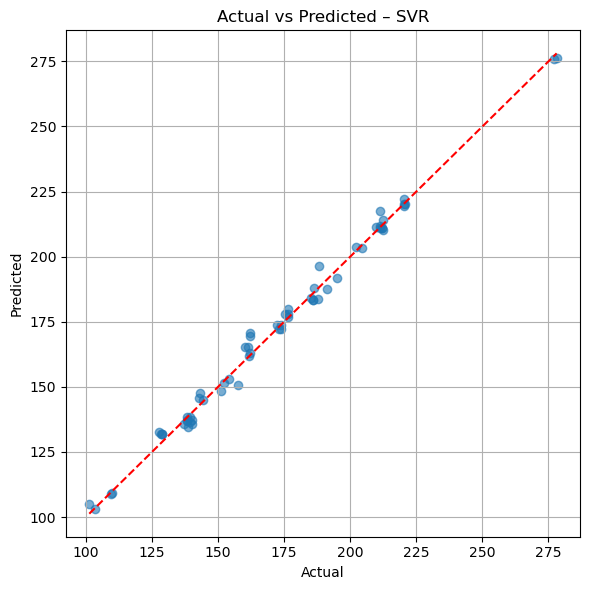

In [28]:
y_pred_svr = svr_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted – SVR")
plt.grid(True)
plt.tight_layout()
plt.show()


### Residual Plot

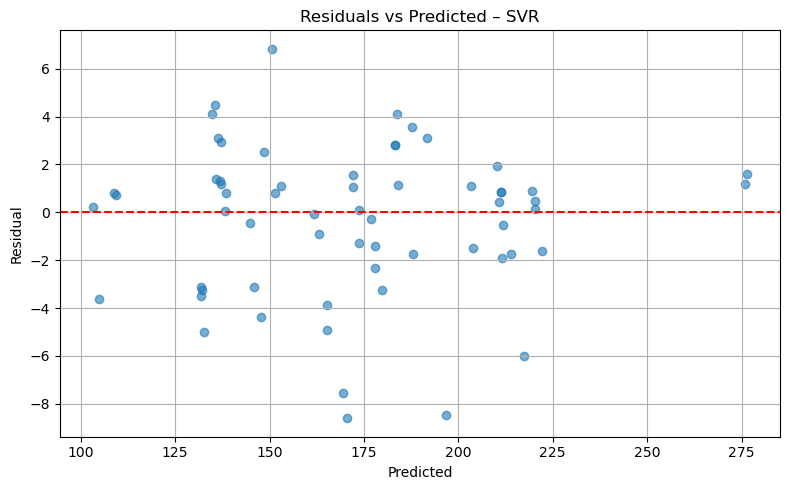

In [29]:
residuals_svr = y_test - y_pred_svr

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_svr, residuals_svr, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted – SVR")
plt.grid(True)
plt.tight_layout()
plt.show()


### KNeighbors Regressor – Non-Parametric Baseline

In [30]:
# KNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')

# Fit model
knn_model.fit(X_train, y_train)

# Evaluate
knn_results = {
    "R2 Score": r2_score(y_test, knn_model.predict(X_test)),
    "MAE": mean_absolute_error(y_test, knn_model.predict(X_test)),
    "RMSE": np.sqrt(mean_squared_error(y_test, knn_model.predict(X_test)))
}
knn_results


{'R2 Score': 0.9970420769097497,
 'MAE': 1.0238709677419353,
 'RMSE': np.float64(2.0475104631659873)}

### Actual vs Predicted Plot

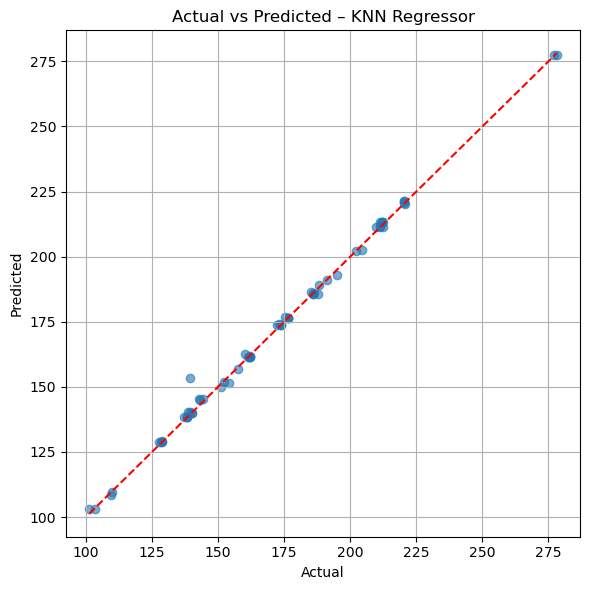

In [31]:
y_pred_knn = knn_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted – KNN Regressor")
plt.grid(True)
plt.tight_layout()
plt.show()


### Residual Plot

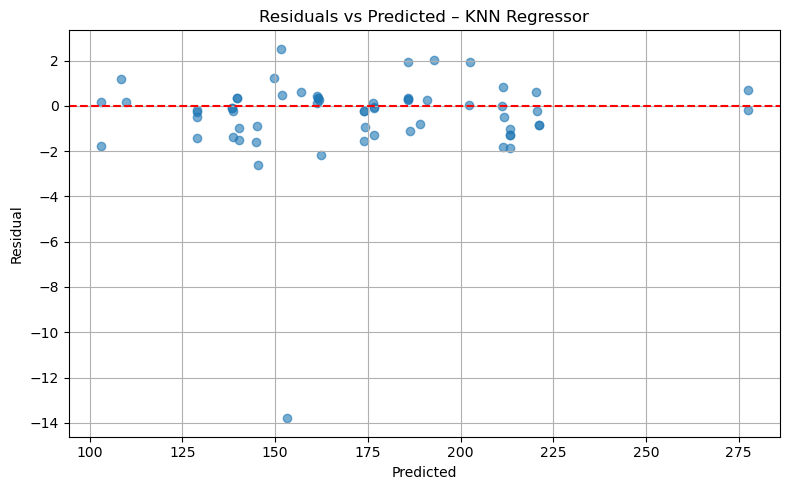

In [32]:
residuals_knn = y_test - y_pred_knn

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_knn, residuals_knn, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted – KNN Regressor")
plt.grid(True)
plt.tight_layout()
plt.show()


### Model Evaluation Summary Table

In [33]:
# Combine all results into one DataFrame
comparison_df = pd.DataFrame([
    {"Model": "Linear Regression",    **linreg_results},
    {"Model": "Random Forest",        **rf_results},
    {"Model": "Gradient Boosting",    **gb_results},
    {"Model": "XGBoost",              **xgb_results},
    {"Model": "SVR",                  **svr_results},
    {"Model": "KNN Regressor",        **knn_results}
])

# Reorder columns for readability
comparison_df = comparison_df[["Model", "R2 Score", "MAE", "RMSE"]]

# Display as a markdown-style table
from IPython.display import display, Markdown

def render_markdown_table(df):
    table = "| Model | R² Score | MAE | RMSE |\n|---|---|---|---|\n"
    for _, row in df.iterrows():
        table += f"| {row['Model']} | {row['R2 Score']:.4f} | {row['MAE']:.2f} | {row['RMSE']:.2f} |\n"
    display(Markdown(table))

# Render the table
render_markdown_table(comparison_df)


| Model | R² Score | MAE | RMSE |
|---|---|---|---|
| Linear Regression | 0.9551 | 3.41 | 7.98 |
| Random Forest | 0.9880 | 1.67 | 4.12 |
| Gradient Boosting | 0.9811 | 2.34 | 5.18 |
| XGBoost | 0.9759 | 2.32 | 5.85 |
| SVR | 0.9932 | 2.36 | 3.11 |
| KNN Regressor | 0.9970 | 1.02 | 2.05 |


### Multi-metric Comparison (Grouped Bar Plot)

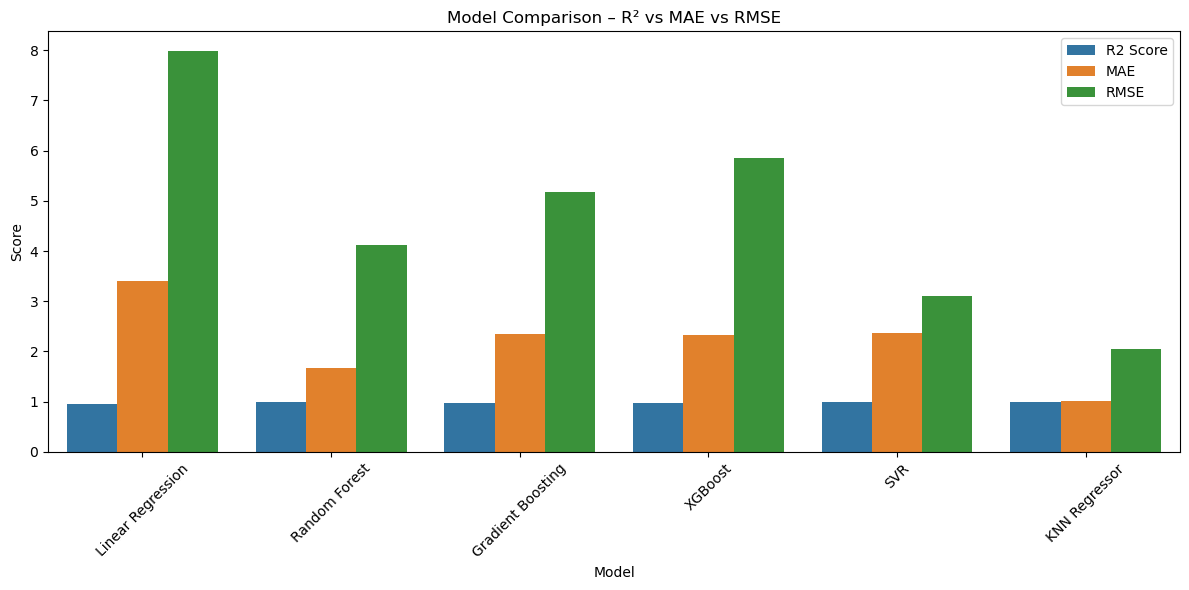

In [34]:
melted_df = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df)
plt.title("Model Comparison – R² vs MAE vs RMSE")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Final Model Insights

- **KNN Regressor** achieved the best overall performance, with the **highest R² score (0.9970)** and the **lowest MAE (1.02)** and **RMSE (2.05)**. Its accuracy demonstrates strong predictive capability when the dataset includes historical quarterly housing prices.
  
- **SVR (Support Vector Regression)** also performed exceptionally well, with an **R² of 0.9932** and **RMSE of 3.11**, proving effective in capturing non-linear relationships without requiring complex ensembles.

- **Random Forest** remained a robust and well-balanced model, with **strong R² (0.9880)** and competitive error rates (**MAE: 1.67, RMSE: 4.12**), benefiting from its ability to handle feature interactions and noisy data.

- **Gradient Boosting** and **XGBoost** delivered solid performance, though slightly behind KNN and SVR in terms of RMSE and MAE. These models are still reliable for their flexibility and tunability, especially in production-scale scenarios.

- **Linear Regression**, while improved by the inclusion of prior quarterly data, still underperformed relative to the other models. Its simplicity limits its effectiveness in capturing complex, non-linear dynamics in housing prices.

> These results affirm that **including historical housing prices significantly boosts model accuracy**, and that **non-linear and instance-based models (like KNN and SVR)** can outperform traditional linear and ensemble methods on structured economic datasets.
